<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [104]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [73]:
# Read Titanic Dataset
titanic_csv = 'titanic_train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [59]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [60]:
# Check Tail
titanic.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [61]:
# ANSWER
titanic.shape


(891, 12)

## Check Types of Data

Check types of data you have

In [62]:
# ANSWER
titanic.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [74]:
# ANSWER
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns?

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every step

### Age

In [75]:
# ANSWER
titanic.Age.fillna(titanic.groupby(by=["Sex"])["Age"].transform("median"), inplace = True)


### Cabin

In [76]:
# ANSWER
titanic.Cabin = titanic.Cabin.apply(lambda x: x[:1] if type(x) is str else x )

titanic.Cabin.value_counts()


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<Axes: xlabel='Pclass'>

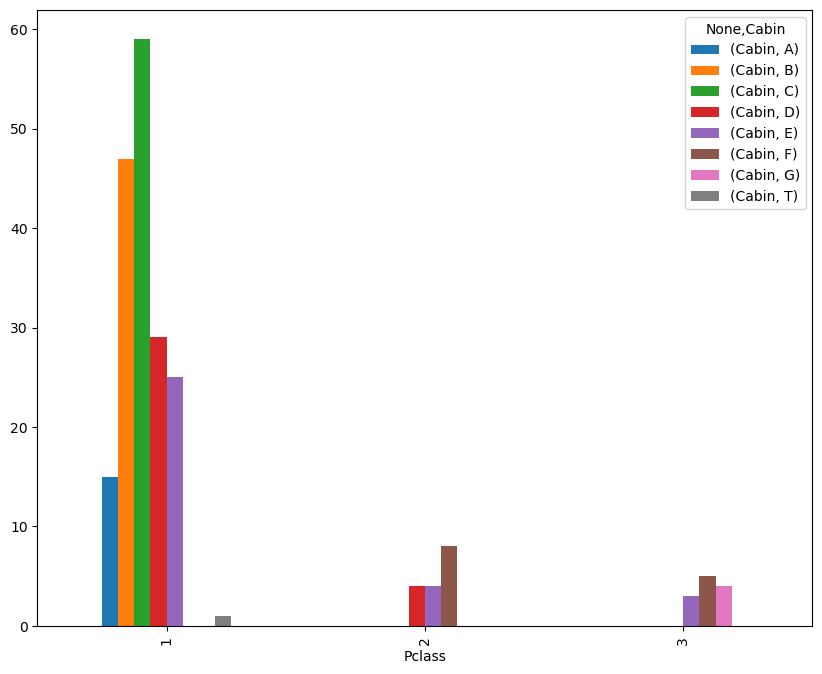

In [68]:
titanic.groupby(by = ["Pclass", "Cabin"]).agg({'Cabin':"count"}).unstack().plot(kind="bar", figsize=(10,8)) 


In [77]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
cabin_map = {"A":1, "B":2,"C":3,"D":4,"E":5,"F":6,"G":7, "T":8}
titanic.Cabin = titanic.Cabin.map(cabin_map)


In [80]:
titanic.Cabin.value_counts()

3.0    59
2.0    47
4.0    33
5.0    32
1.0    15
6.0    13
7.0     4
8.0     1
Name: Cabin, dtype: int64

In [82]:
titanic.Cabin.value_counts()

3.0    59
2.0    47
4.0    33
5.0    32
1.0    15
6.0    13
7.0     4
8.0     1
Name: Cabin, dtype: int64

In [83]:
titanic.Cabin.fillna(titanic.groupby(by = ["Pclass" ])["Cabin"].transform("mean"), inplace = True)

In [84]:
titanic.Cabin.value_counts()

6.083333    479
5.250000    168
3.000000     59
2.000000     47
3.039773     40
4.000000     33
5.000000     32
1.000000     15
6.000000     13
7.000000      4
8.000000      1
Name: Cabin, dtype: int64

In [85]:
titanic.Cabin = np.round(titanic.Cabin, decimals = 0)

In [86]:
titanic.Cabin.value_counts()

6.0    492
5.0    200
3.0     99
2.0     47
4.0     33
1.0     15
7.0      4
8.0      1
Name: Cabin, dtype: int64

### Embarked

In [12]:
# ANSWER
titanic.Embarked.value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [13]:
titanic.Embarked = titanic.Embarked.apply(lambda x: x if type(x) is str else "S")

# Describe

Describe your dataset.

In [14]:
# ANSWER
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Cabin,400.0,6.160000,1.996086,4.00,4.0000,8.0000,8.0,8.0000


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [15]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use the `bar_charts` function above to view the relationship between survived and pclass.  Note your findings.

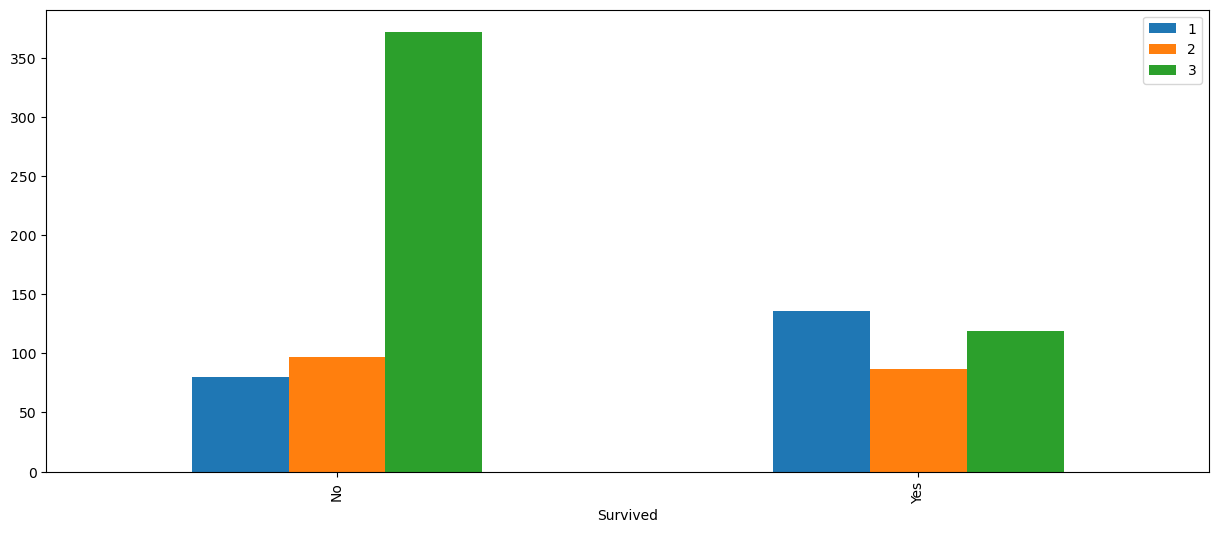

In [16]:
# ANSWER
bar_charts(titanic, 'Pclass')



## Sex

Use `bar_charts` to view the relationship between survived and sex.  Note your findings.

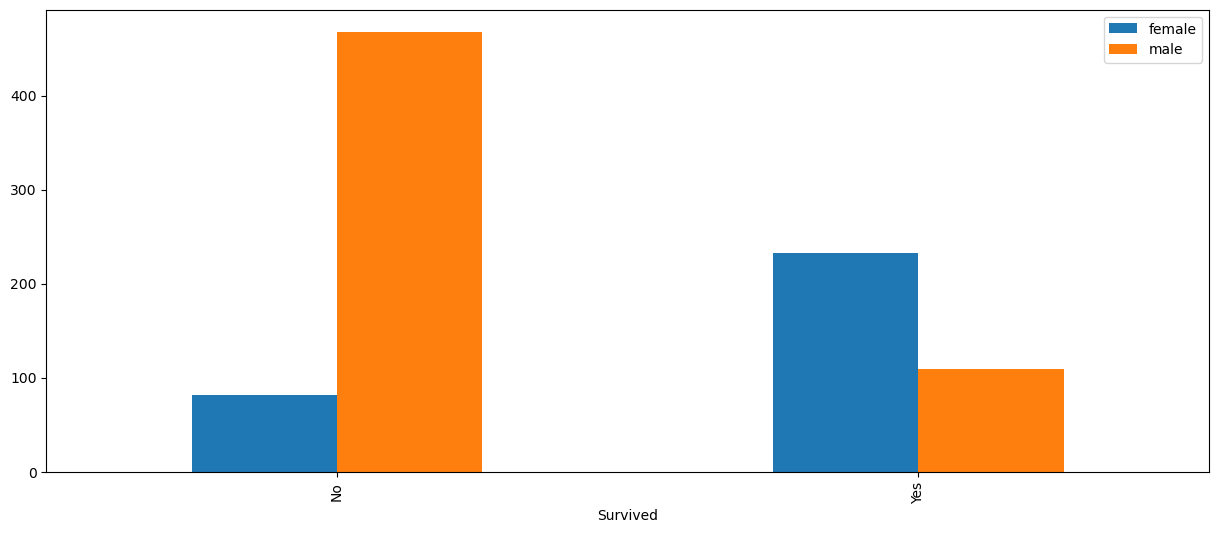

In [17]:
# ANSWER
bar_charts(titanic, 'Sex')

## Parch

Parch = Number of parents and children travelling with each passenger. Use `bar_charts` to view the relationship between survived and Parch.

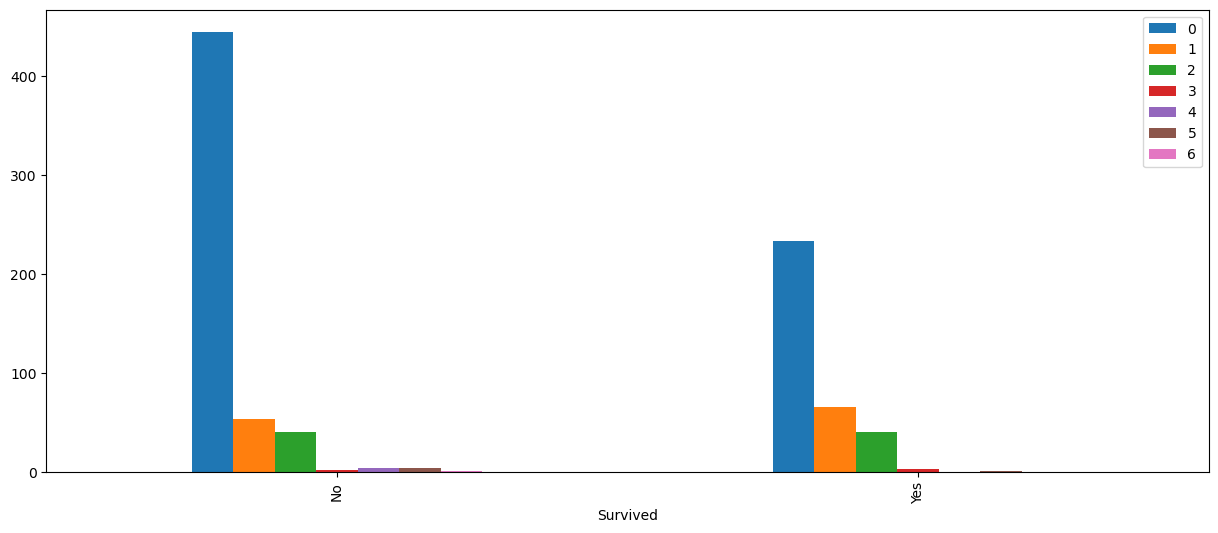

In [18]:
# ANSWER
bar_charts(titanic, 'Parch')


## SibSp

SibSp = Number of siblings and spouses travelling with each passenger. Use `bar_charts` to view the relationship between survived and SibSp.

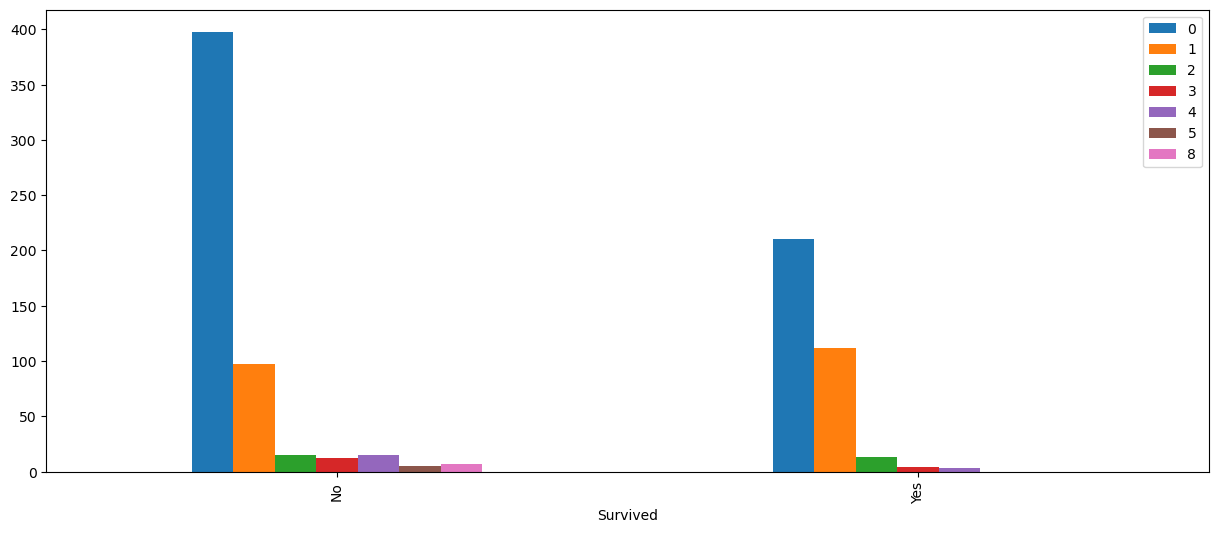

In [19]:
# ANSWER
bar_charts(titanic, 'SibSp')


## Embarked

Do the same for the Embarked variable.

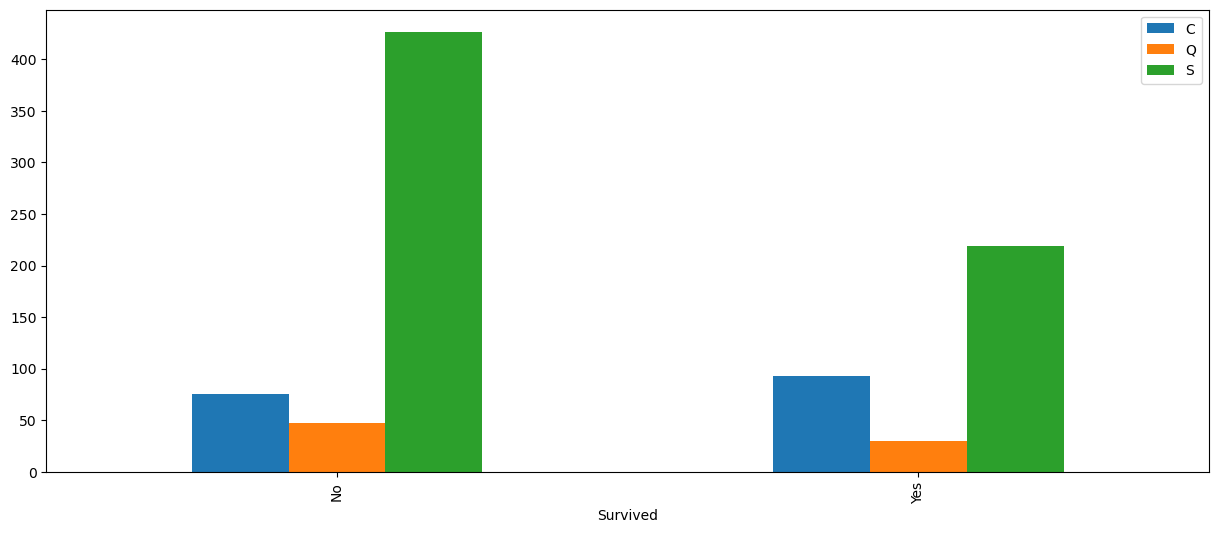

In [20]:
# ANSWER
bar_charts(titanic, 'Embarked')

# Feature Engineering

We shall create some new features from the existing features.

## Fare Class

Create a new column 'Fare class' based on their fare as defined below. Is there any relationship between fare and survival?

In [24]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

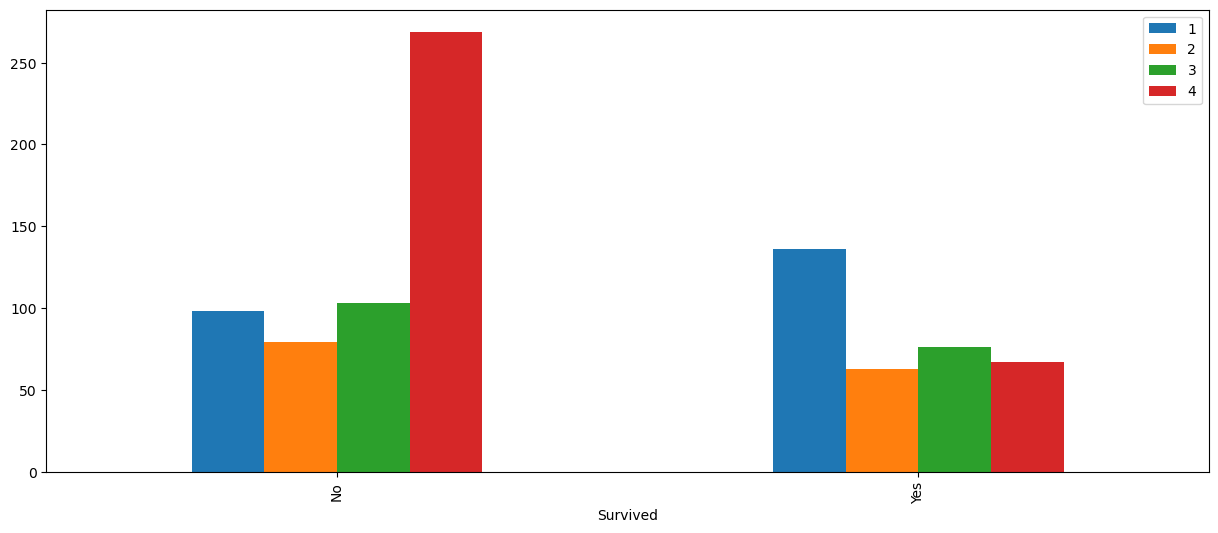

In [29]:
# ANSWER
titanic['fare_class'] = titanic.Fare.apply(create_fare_class)

bar_charts(titanic, 'fare_class')


## Age Class

Similarly, create a new column 'Age class' based on their age as defined below.

In [25]:
titanic.Age.value_counts()

29.00    144
27.00     71
24.00     30
22.00     27
18.00     26
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [31]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

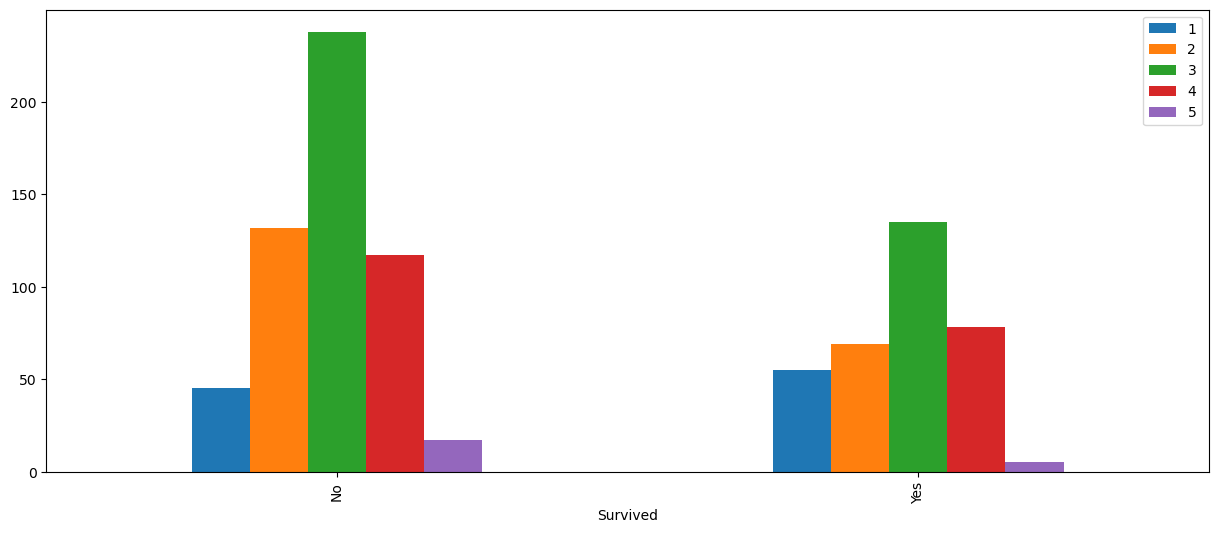

In [33]:
# ANSWER

titanic['age_class'] = titanic.Age.apply(create_age_class)

bar_charts(titanic, 'age_class')

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [34]:
# ANSWER
titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,fare_class,age_class
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658,0.031415,0.003258,0.026653
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307,0.157345,-0.307600,-0.067911
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500,-1.000000,0.719670,-0.292128
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161,0.246266,-0.113032,0.928753
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651,0.011925,-0.380692,-0.232166
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225,-0.017277,-0.387100,-0.168121
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000,0.477827,-0.599129,0.075551
Cabin,0.031415,0.157345,-1.000000,0.246266,0.011925,-0.017277,0.477827,1.000000,-0.658909,0.244254
fare_class,0.003258,-0.307600,0.719670,-0.113032,-0.380692,-0.387100,-0.599129,-0.658909,1.000000,-0.080506
age_class,0.026653,-0.067911,-0.292128,0.928753,-0.232166,-0.168121,0.075551,0.244254,-0.080506,1.000000


In [36]:
# Survived is correlated with Pclass and fare_class

# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group.

Collect two sets of data, one with the passengers greater than 35 years and another one with the passengers younger than 35. The sample sizes should ideally be the same but they can be different. Let's say that the sample sizes are 100.

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_class,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,8.0,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,8.0,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,3


In [95]:
N=100
# ANSWER
titanic_young = titanic[titanic.Age <= 35 ].sample(N)
titanic_old =  titanic[titanic.Age <= 35 ].sample(N)





In [96]:
titanic_young.Survived.value_counts()

0    65
1    35
Name: Survived, dtype: int64

In [97]:
titanic_old.Survived.value_counts()

0    61
1    39
Name: Survived, dtype: int64

### Set alpha (let alpha = 0.05)


In [98]:
# ANSWER

alpha=0.05

In [100]:
a = titanic_young['Survived']
b = titanic_old['Survived']



### Calculate test statistic

> Here we identify a test statistic that can be used to assess the truth of the null hypothesis.

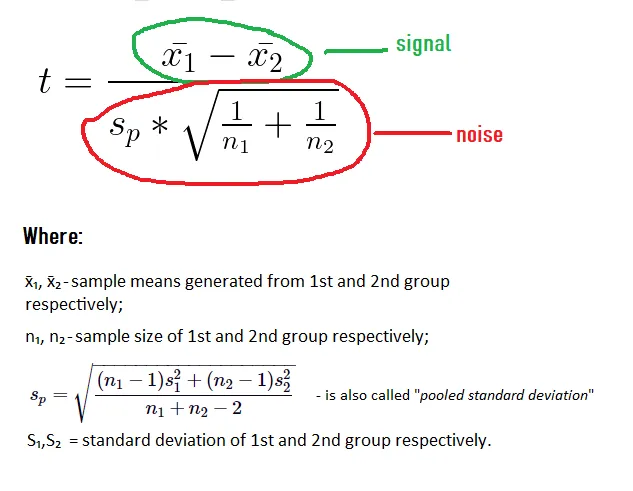



This can also be represented as below:

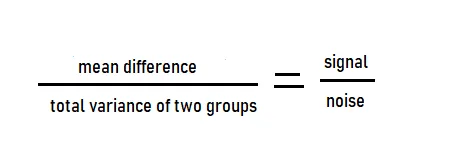

Basically, t-statistic is a signal-to-noise ratio


In [111]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [112]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

print(t)

-0.5833972789147402


### Find the p-value

> Next we compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [113]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
if (t > 0):
    p = 2*(1 - stats.t.cdf(t, df = df))
else:
    p = 2*stats.t.cdf(t, df = df)

In [114]:
print("t = " + str(t))
print("p = " + str(p))

t = -0.5833972789147402
p = 0.5602898194136178


### Interpret results

> The p-value is compared to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [115]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")

In [116]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -0.5833972789147401
p = 0.5602898194136178
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



